Step 1) Functions for creating spectrograms and PNGs from WAV files

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import tensorflow as tf
import os
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr, S=None, n_fft=1024, hop_length=80, win_length=320, window='hann', center=True, pad_mode='constant', power=2.0)
    #ms = librosa.feature.melspectrogram(y=y, sr=sr, S=None)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

Step 2) Converting wav to pngs and saving images as x and labels as y

In [2]:
# All locations
folder_name = "../dataset_onlyva"
path_clean = folder_name + "/clean/"
path_0dB = folder_name + "/0dB/"
path_n3dB = folder_name + "/-3dB/"
path_n6dB = folder_name + "/-6dB/"
path_n9dB = folder_name + "/-9dB/"
path_3dB = folder_name + "/3dB/"
path_6dB = folder_name + "/6dB/"
path_9dB = folder_name + "/9dB/"

In [8]:
# All locations
spectrogam_name = "Spectrograms_wide_VA"
spath_clean = spectrogam_name + "/clean/"
spath_0dB = spectrogam_name + "/0dB/"
spath_n3dB = spectrogam_name + "/-3dB/"
spath_n6dB = spectrogam_name + "/-6dB/"
spath_n9dB = spectrogam_name + "/-9dB/"
spath_3dB = spectrogam_name + "/3dB/"
spath_6dB = spectrogam_name + "/6dB/"
spath_9dB = spectrogam_name + "/9dB/"
path = spectrogam_name

In [4]:
isExist = os.path.exists(path)
if not isExist:
       # Create a new directory because it does not exist
   os.makedirs(path)
   os.makedirs(path + "/clean")
   os.makedirs(path + "/0dB")
   os.makedirs(path + "/-3dB")
   os.makedirs(path + "/-6dB")
   os.makedirs(path + "/-9dB")
   os.makedirs(path + "/3dB")
   os.makedirs(path + "/6dB")
   os.makedirs(path + "/9dB")
   print("the %s directory is created!", path)

Creating difference between narrow and wide

In [ ]:
create_pngs_from_wavs(path_0dB, "difference_spec/narrow")

In [7]:
create_pngs_from_wavs(path_0dB, "difference_spec/wide")

Start here if u dont want to compare

In [52]:
create_pngs_from_wavs(path_clean, spath_clean)

In [53]:
create_pngs_from_wavs(path_0dB, spath_0dB)

In [54]:
create_pngs_from_wavs(path_n3dB, spath_n3dB)

In [55]:
create_pngs_from_wavs(path_n6dB, spath_n6dB)

In [56]:
create_pngs_from_wavs(path_n9dB, spath_n9dB)

In [57]:
create_pngs_from_wavs(path_3dB, spath_3dB)

In [58]:
create_pngs_from_wavs(path_6dB, spath_6dB)

In [59]:
create_pngs_from_wavs(path_9dB, spath_9dB)

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np
import matplotlib.pyplot as plt

def load_images_from_path(path, label, limit=1500):
    images = []
    labels = []

    file_list = os.listdir(path)
    if limit is not None:
        file_list = file_list[:limit]

    for file in file_list:
        images.append(img_to_array(load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append(label)
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

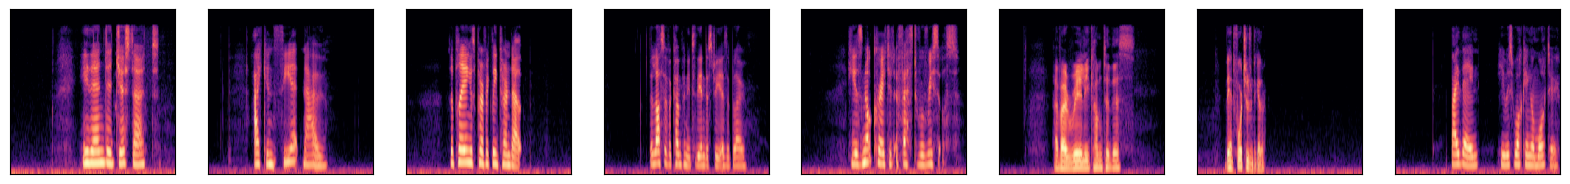

In [4]:
images, labels = load_images_from_path(spath_clean, 0)
show_images(images)
    
x += images
y += labels

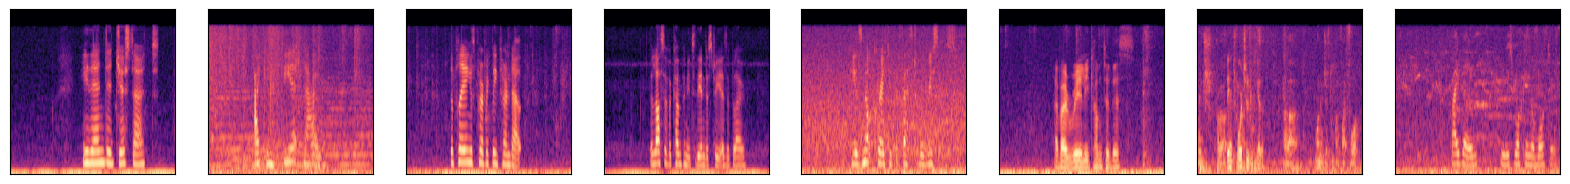

In [5]:
images, labels = load_images_from_path(spath_0dB, 1)
show_images(images)
    
x += images
y += labels

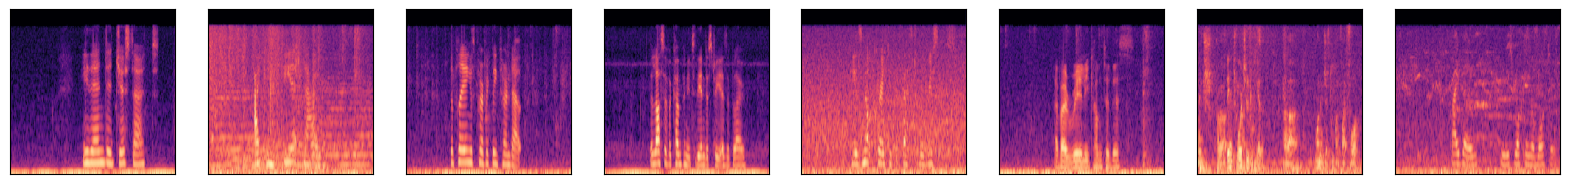

In [6]:
images, labels = load_images_from_path(spath_n3dB, 2)
show_images(images)
    
x += images
y += labels

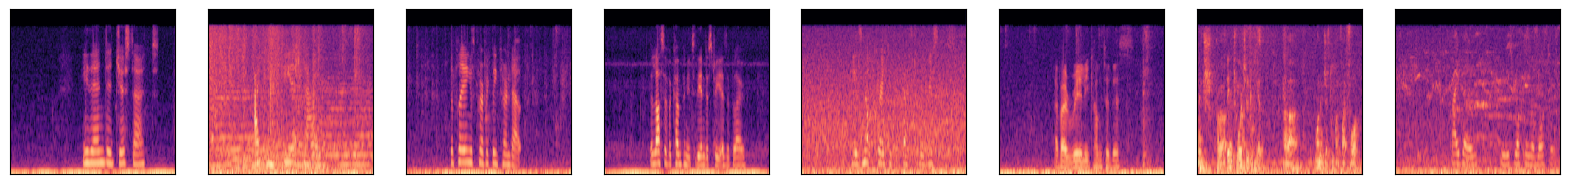

In [7]:
images, labels = load_images_from_path(spath_n6dB, 3)
show_images(images)
    
x += images
y += labels

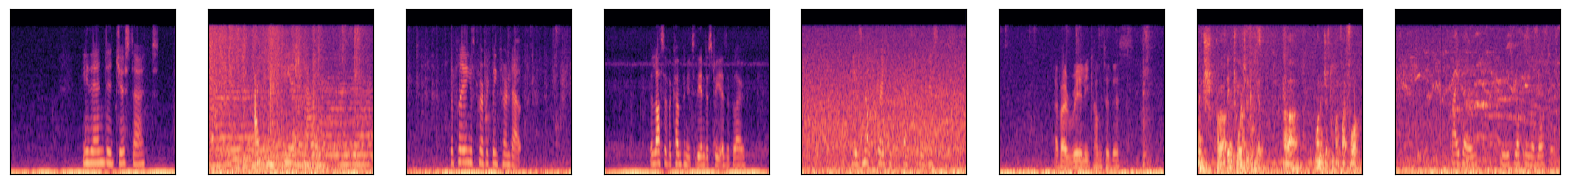

In [8]:
images, labels = load_images_from_path(spath_n9dB, 4)
show_images(images)
    
x += images
y += labels

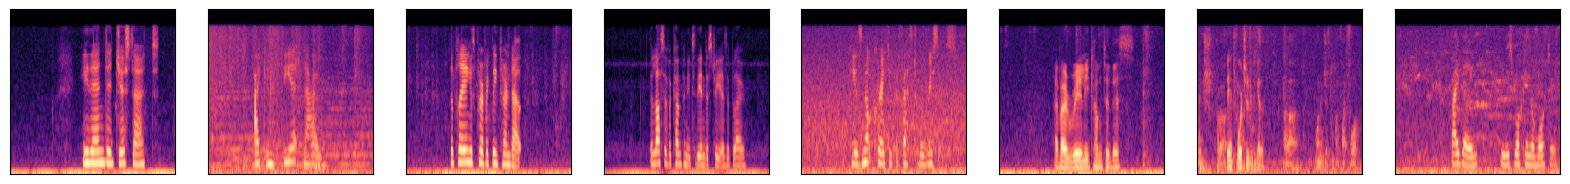

In [9]:
images, labels = load_images_from_path(spath_3dB, 5)
show_images(images)
    
x += images
y += labels

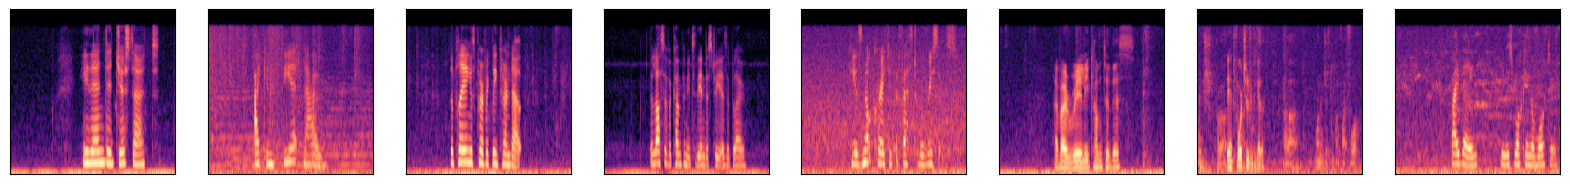

In [10]:
images, labels = load_images_from_path(spath_6dB, 6)
show_images(images)
    
x += images
y += labels

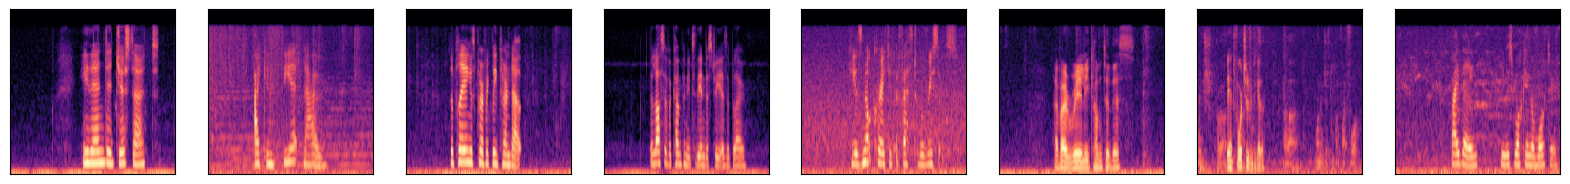

In [11]:
images, labels = load_images_from_path(spath_9dB, 7)
show_images(images)
    
x += images
y += labels

Step 3) Spliting the dataset into training and testing 80/20, respectively 

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=0)

# Normalize the data
x_train_norm = np.array(x_train) / 255
x_val_norm = np.array(x_val) / 255
x_test_norm = np.array(x_test) / 255

# Encode the labels
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

NameError: name 'x' is not defined

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(8, activation='softmax')) # 8 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

Step 4) Training the model with a batch size and epoch number of 10

In [15]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_val_norm, y_val_encoded), batch_size=10, epochs=20)

Epoch 1/20
960/960 [==============================] - 27s 18ms/step - loss: 1.7116 - accuracy: 0.2843 - val_loss: 1.2955 - val_accuracy: 0.4467
Epoch 2/20
960/960 [==============================] - 16s 16ms/step - loss: 0.9951 - accuracy: 0.5606 - val_loss: 0.8913 - val_accuracy: 0.5983
Epoch 3/20
960/960 [==============================] - 16s 17ms/step - loss: 0.7336 - accuracy: 0.6980 - val_loss: 0.6806 - val_accuracy: 0.7325
Epoch 4/20
960/960 [==============================] - 17s 18ms/step - loss: 0.6085 - accuracy: 0.7518 - val_loss: 0.7105 - val_accuracy: 0.7133
Epoch 5/20
960/960 [==============================] - 17s 18ms/step - loss: 0.5008 - accuracy: 0.7951 - val_loss: 0.4872 - val_accuracy: 0.8108
Epoch 6/20
960/960 [==============================] - 17s 17ms/step - loss: 0.4211 - accuracy: 0.8316 - val_loss: 0.4769 - val_accuracy: 0.8217
Epoch 7/20
960/960 [==============================] - 16s 17ms/step - loss: 0.3453 - accuracy: 0.8635 - val_loss: 0.4712 - val_accuracy:

Step 5) Evaluation

[]

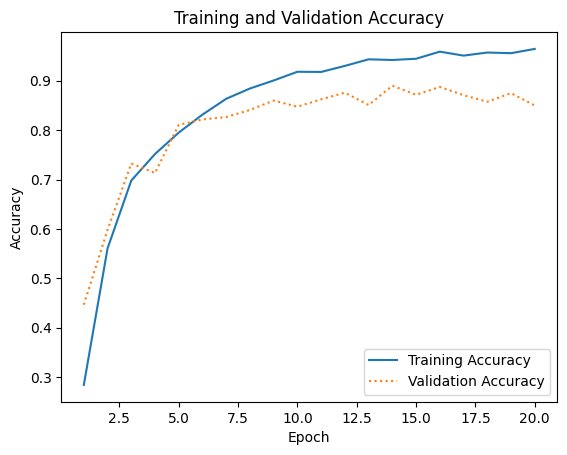

In [16]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [17]:
# Test the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test_encoded)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


38/38 [==============================] - 1s 23ms/step - loss: 0.6059 - accuracy: 0.8617
Test Loss: 0.6058692932128906
Test Accuracy: 0.8616666793823242


Text(110.44999999999997, 0.5, 'Actual label')

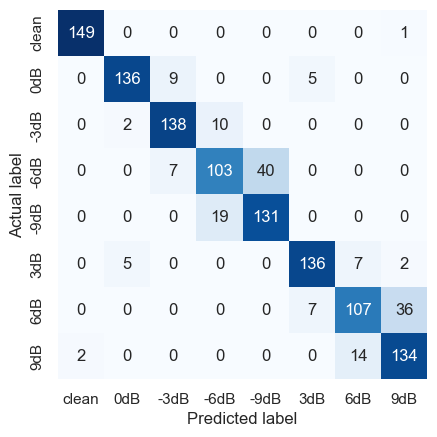

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(x_test_norm)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['clean', '0dB', '-3dB', '-6dB', '-9dB', '3dB', '6dB', '9dB']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Step 6) Saving the model

In [35]:
model_path = "models"

isExist = os.path.exists(model_path)
if not isExist:
    # Create a new directory because it does not exist
   os.makedirs(model_path)
   print("the %s directory is created!", model_path)

In [19]:
model.save('models/my_model.h5')

In [5]:
import tensorflow as tf

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('models/my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [6]:
# Evaluate the model on the test data
loss, accuracy = new_model.evaluate(x_test_norm, y_test_encoded)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

NameError: name 'x_test_norm' is not defined

Step 8) Testing model with test_dataset

In [1]:
# All locations
folder_name = "../Spectogram/Filter_outputs_Alpha0.8/Spectral_subtract"
path_0dB = folder_name + "/0dB/"
path_n3dB = folder_name + "/-3dB/"
path_n6dB = folder_name + "/-6dB/"
path_n9dB = folder_name + "/-9dB/"
path_3dB = folder_name + "/3dB/"
path_6dB = folder_name + "/6dB/"
path_9dB = folder_name + "/9dB/"

In [9]:
entries = os.listdir(path_6dB)
print(len(entries))

50


In [10]:
path_spec_test = path + "/Spectral_subtract/Alpha0.8"

isExist = os.path.exists(path_spec_test)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path_spec_test)
    os.makedirs(path_spec_test + "/-3dB")
    os.makedirs(path_spec_test + "/-6dB")
    os.makedirs(path_spec_test + "/-9dB")
    os.makedirs(path_spec_test + "/0dB")
    os.makedirs(path_spec_test + "/3dB")
    os.makedirs(path_spec_test + "/6dB")
    os.makedirs(path_spec_test + "/9dB")
    print("the %s directory is created!", path_spec_test)

the %s directory is created! Spectrograms_wide_VA/Spectral_subtract/Alpha0.8


In [11]:
create_pngs_from_wavs(path_n3dB, path_spec_test + '/-3dB')
create_pngs_from_wavs(path_n6dB, path_spec_test + '/-6dB')
create_pngs_from_wavs(path_n9dB, path_spec_test + '/-9dB')
create_pngs_from_wavs(path_0dB, path_spec_test + '/0dB')
create_pngs_from_wavs(path_3dB, path_spec_test + '/3dB')
create_pngs_from_wavs(path_6dB, path_spec_test + '/6dB')
create_pngs_from_wavs(path_9dB, path_spec_test + '/9dB')

In [14]:
noisy = ["-3dB", "-6dB", "-9dB"]
clean = ["0dB", "3dB", "6dB", "9dB", "clean"]
target_names = ["clean", "0dB", "-3dB", "-6dB", "-9dB", "3dB", "6dB", "9dB"]
user_target = ["0dB", "-3dB", "-6dB", "-9dB", "3dB", "6dB", "9dB"]

for target in user_target:
    name_img = path_spec_test + '/' + target
    image_paths = os.listdir(name_img)
    correct = 0
    same = 0
    for image_path in image_paths:
        # Preprocess the image
        image = img_to_array(load_img(path_spec_test + '/' + target + '/' + image_path, target_size=(224, 224, 3)))
        image = image / 255.0
        image = np.expand_dims(image, axis=0)

        # Make predictions
        predictions = new_model.predict(image)
        
        # Find the index of the maximum prediction
        predicted_index = np.argmax(predictions)
        # Check if the predicted class matches the target
        predicted_class = target_names[predicted_index]
        #print(predicted_class, end = " ")
        if predicted_class == target:
            same += 1

        if target in noisy:
            target_cat = noisy
            if predicted_class in noisy:
                correct += 1
        else:
            target_cat = clean
            if predicted_class in clean:
                correct += 1
        
    #print(" ")
    print("SAME SNR (" + target + ") Accuracy: {:.2f}%".format(same / len(image_paths) * 100))    
    print("IN CATEGORY (" + ', '.join(target_cat) + ") Accuracy: {:.2f}%".format(correct / len(image_paths) * 100))

SAME SNR (0dB) Accuracy: 32.00%
IN CATEGORY (0dB, 3dB, 6dB, 9dB, clean) Accuracy: 90.00%
SAME SNR (-3dB) Accuracy: 28.00%
IN CATEGORY (-3dB, -6dB, -9dB) Accuracy: 42.00%
SAME SNR (-6dB) Accuracy: 20.00%
IN CATEGORY (-3dB, -6dB, -9dB) Accuracy: 60.00%
SAME SNR (-9dB) Accuracy: 32.00%
IN CATEGORY (-3dB, -6dB, -9dB) Accuracy: 72.00%
SAME SNR (3dB) Accuracy: 22.00%
IN CATEGORY (0dB, 3dB, 6dB, 9dB, clean) Accuracy: 98.00%
SAME SNR (6dB) Accuracy: 26.00%
IN CATEGORY (0dB, 3dB, 6dB, 9dB, clean) Accuracy: 100.00%
SAME SNR (9dB) Accuracy: 78.00%
IN CATEGORY (0dB, 3dB, 6dB, 9dB, clean) Accuracy: 100.00%
